##<center> Lant Markov definit  pe "ceas" </center>##

Definim un lant Markov pe $\mathbb{Z}_{12}$. Starile lantului sunt $\{0,1,2,\ldots, 11\}$, considerate ca orele marcate pe ceas.  Cand  indicatorul arata ora H, cu probabilitatea de 1/2 el sare la una din orele vecine.

Simulam miscarea aleatoare a indicatorului (adica lantul Markov asociat) in figura de mai jos.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
plt.rcParams['figure.figsize']=6,6

In [2]:
from matplotlib import animation
from JSAnimation import IPython_display  # se descarca de aici https://github.com/jakevdp/JSAnimation
                                         # si se instalaeaza din directorul in care s-a dezarhivat 
                                         # dand comanda       python setup.py install 

In [6]:
def RandWalkClock():
    pi=np.pi
    t=np.linspace(0,1, 200)
    z=np.exp(2*pi*t*1j) #cercul unitate ca ceas
    theta=np.array([k*pi/6 for k in range(12)])
    w=np.exp(theta*1j) # pozitia orelor pe ceas
   
    def hour_gen():#genereaza ora 
        visit=12*[0]
        h= 3# pozitia initiala a indicatorului este 3*pi/6=pi/2, adica e ora 12 :)
      
        while sum(visit)<12:
            yield h%12
            visit[h%12]=1   
            if rnd.random()<0.5:
                h-=1 
            else: 
                h+=1 
             
    def animate(k):
        v.set_UVC(0.97*w[k].real,0.97*w[k].imag)
        return   v

    fig = plt.figure()
    ax = fig.add_subplot(111,   xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), aspect='equal')

    ax.plot(z.real, z.imag, 'b', lw=2)# deseneaza cercul 
    ax.plot(0.98*w.real, 0.98*w.imag, 'bs')# marcheaza orele cu cate o patratzica
    X=[0]
    Y=[0]
    ax.plot(X, Y, color=(0, 0, 0), marker='o')  # deseneaza originea indicatorului 
    v=ax.quiver( X, Y, [], [], color=(0, 0, 0), scale_units='xy', angles='xy',
            scale=1, linewidth=.1) # v e directia indicatorului, vector cu originea in (0,0) si extremitatea
                                   # in (0.97*w[k].real, 0.97*w[k].imag)
    anim=animation.FuncAnimation(fig, animate, frames=hour_gen, blit=True,
                                  interval=120, repeat=False)# genereaza un nou frame in fiecare 120 millisecunde
    return anim  


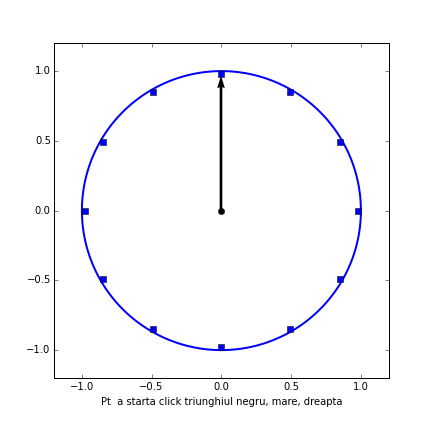
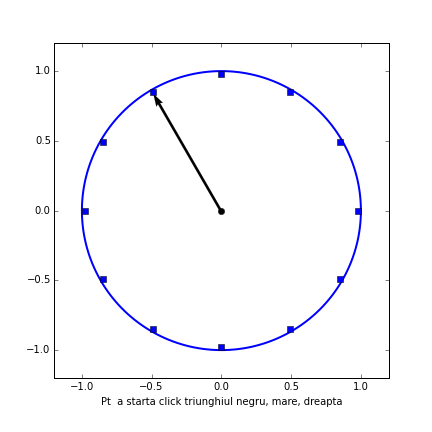
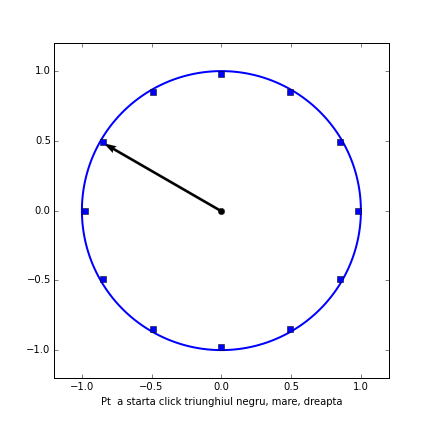
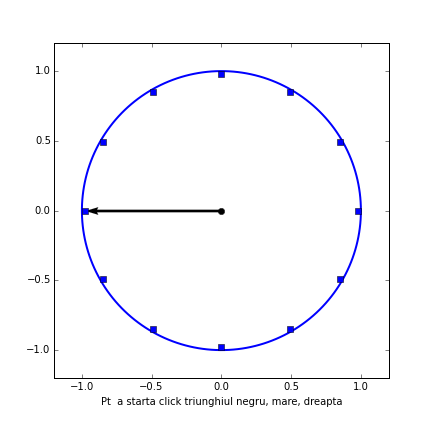
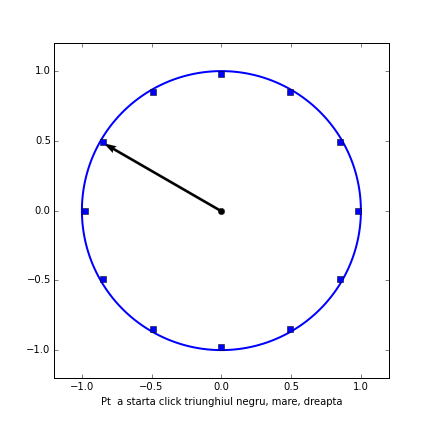
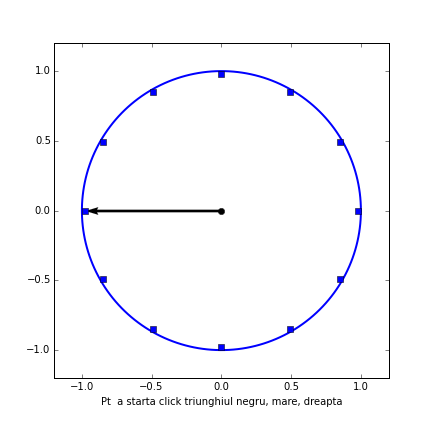
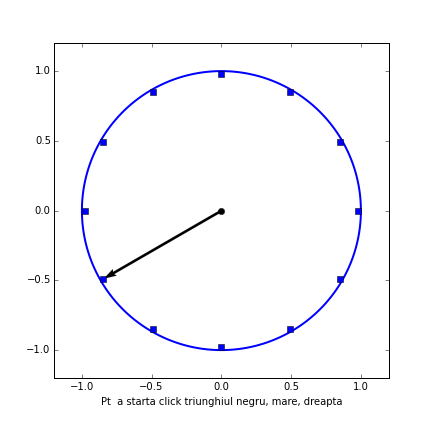
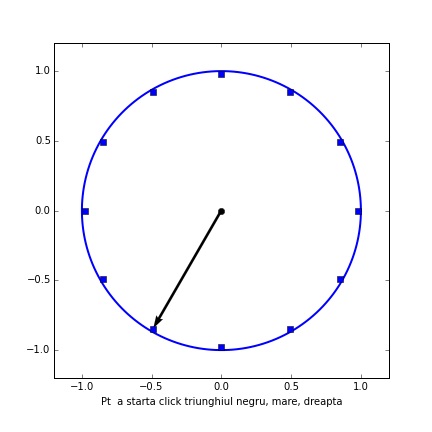
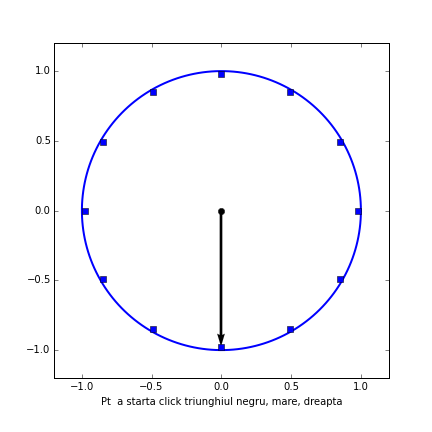
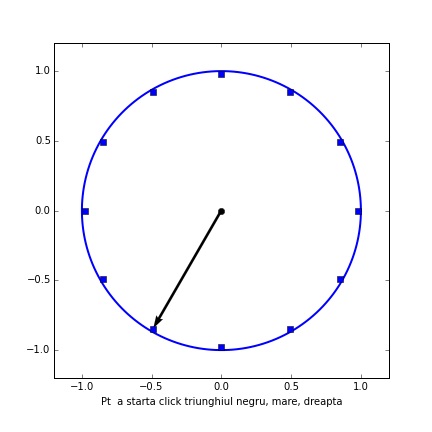
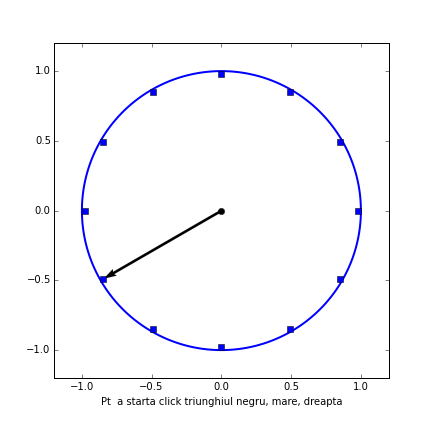
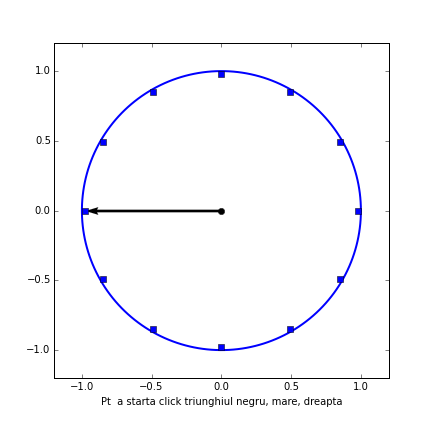
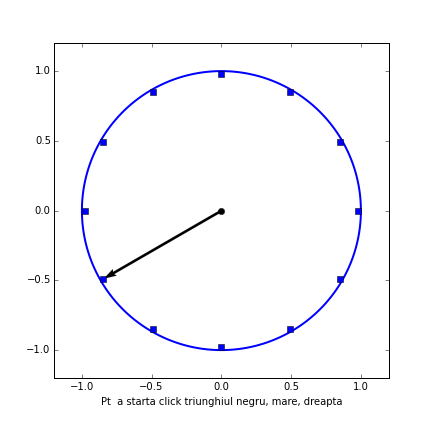
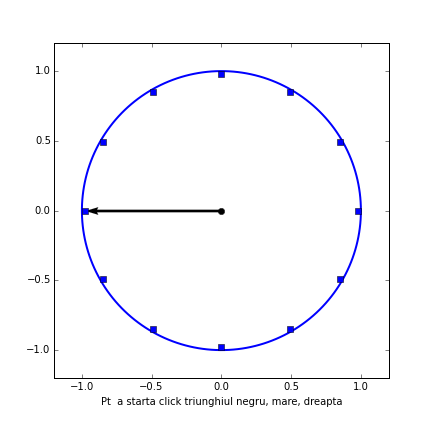
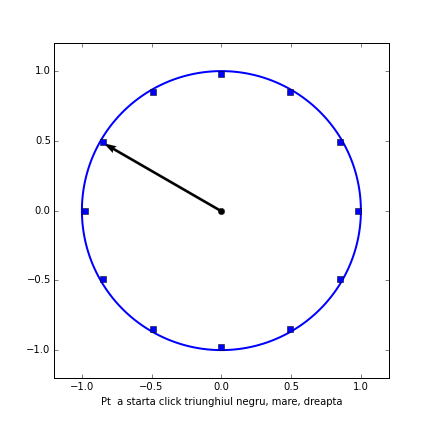
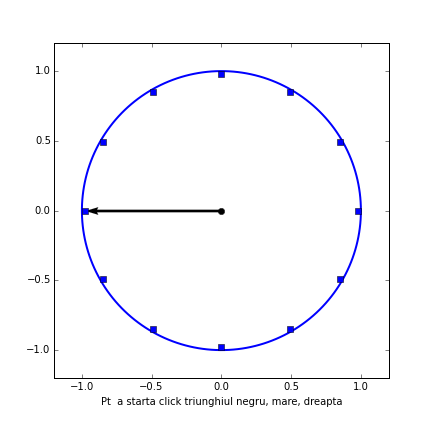
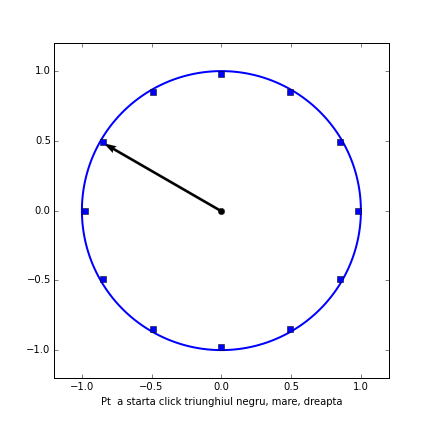
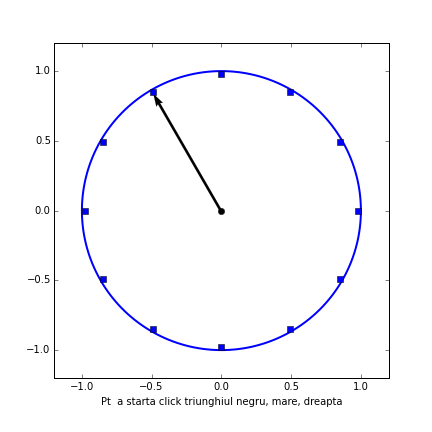
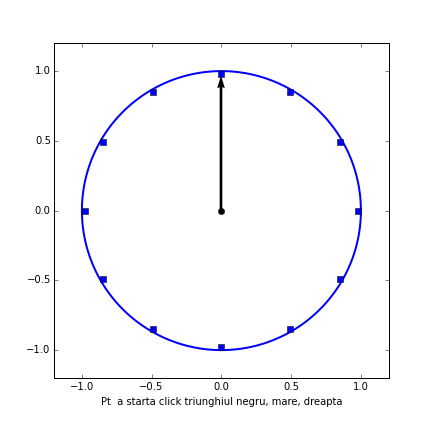
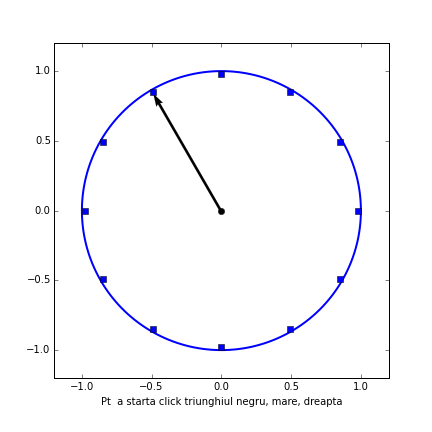
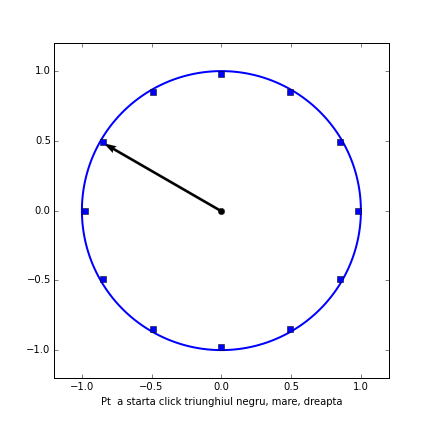
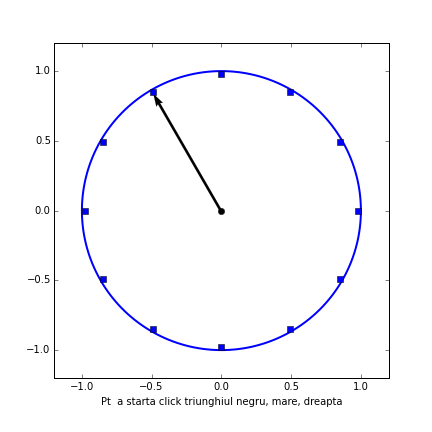
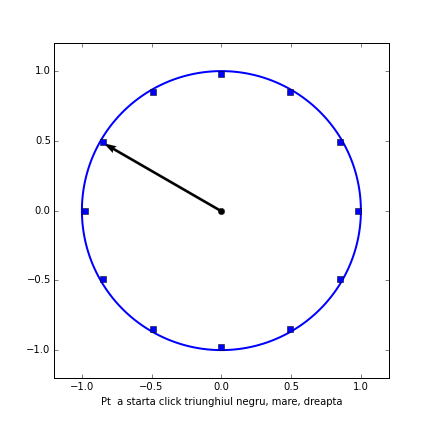
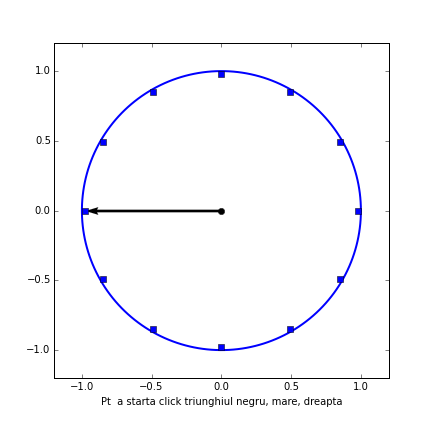
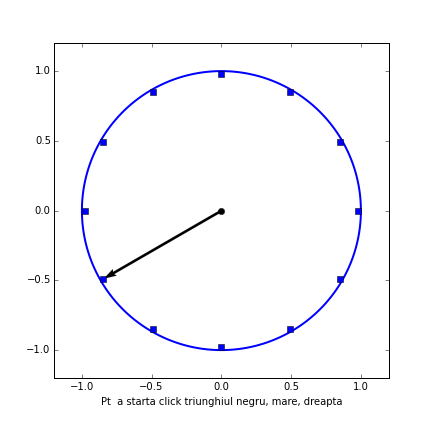
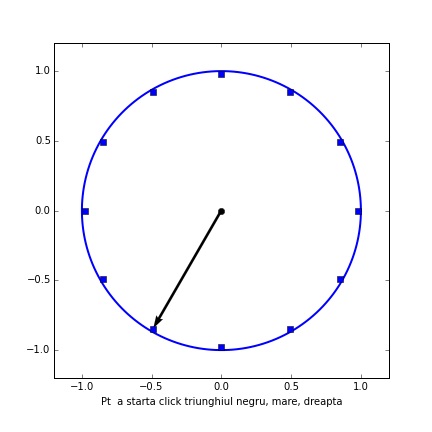
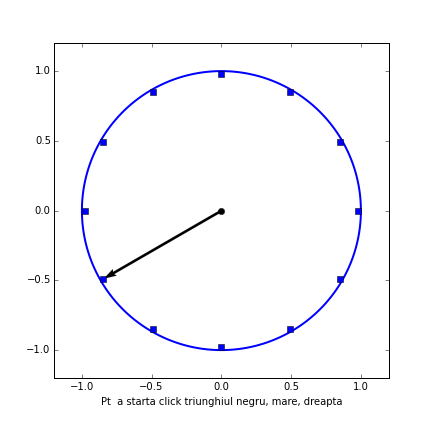
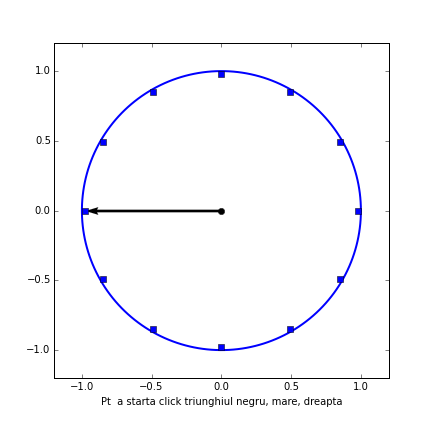
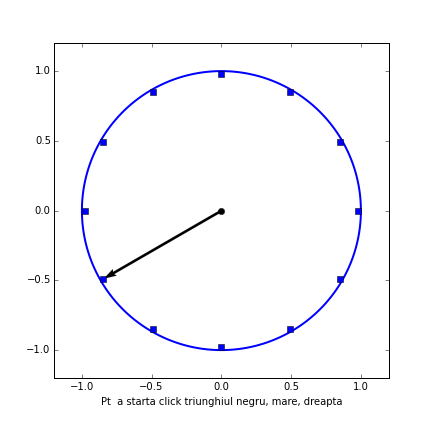
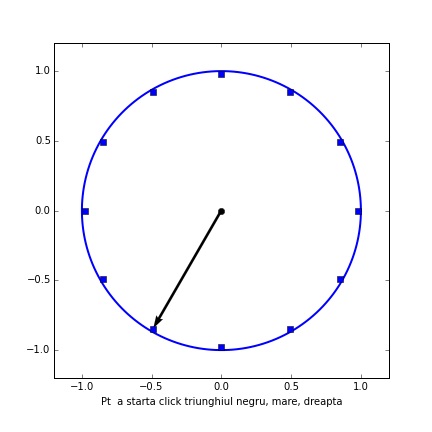
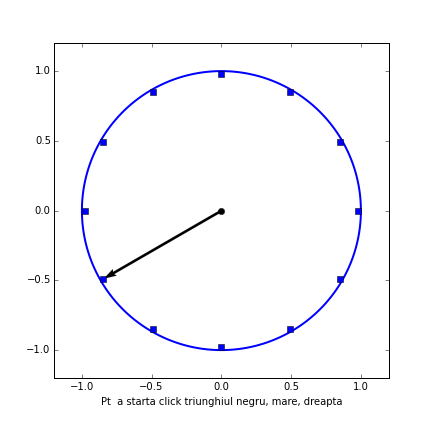
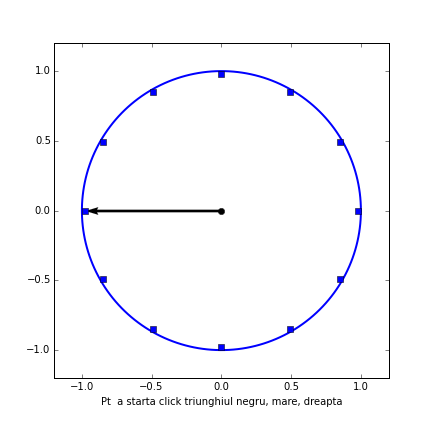
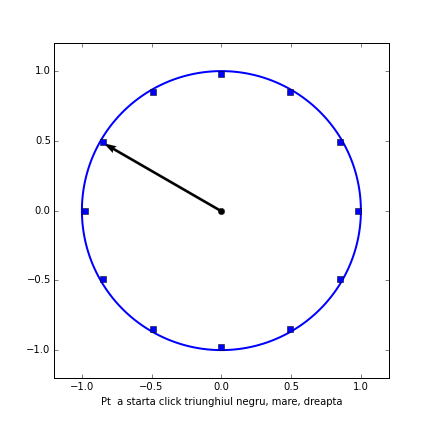
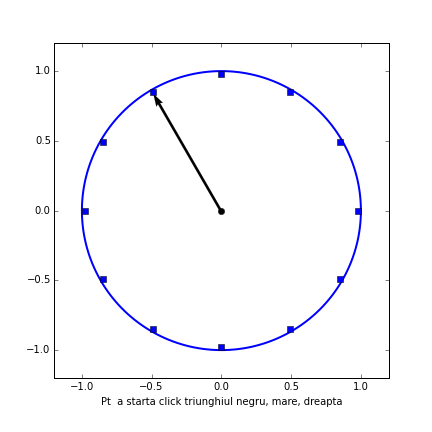
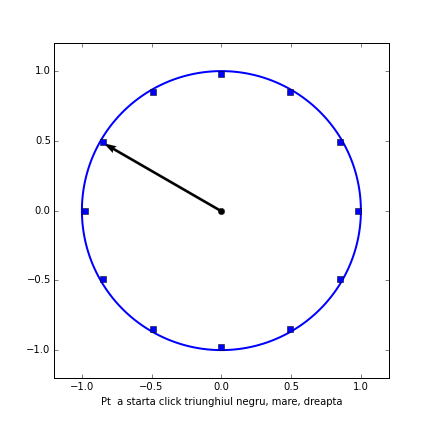
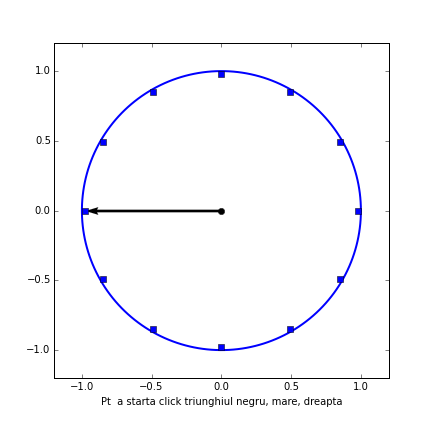
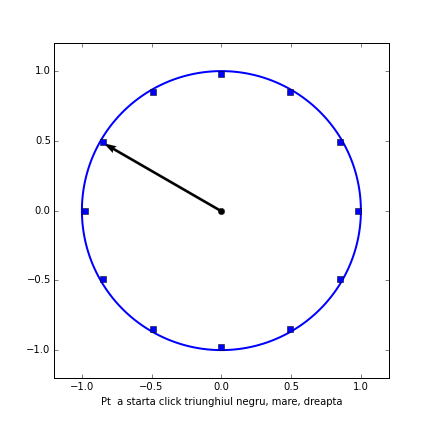
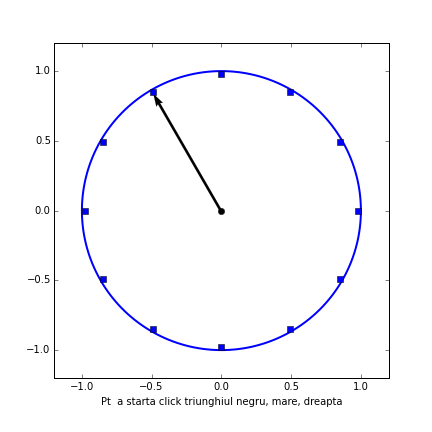
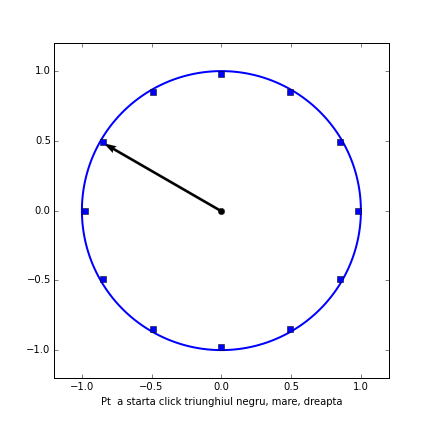
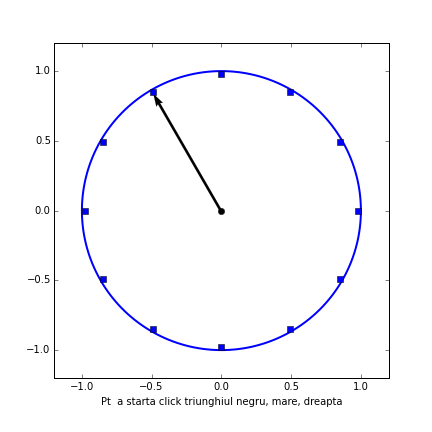
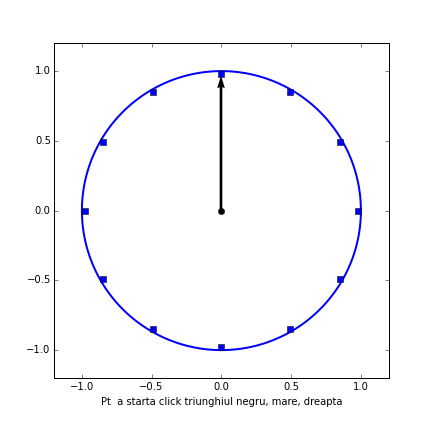
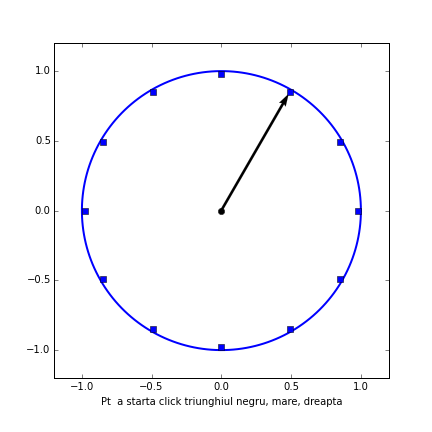
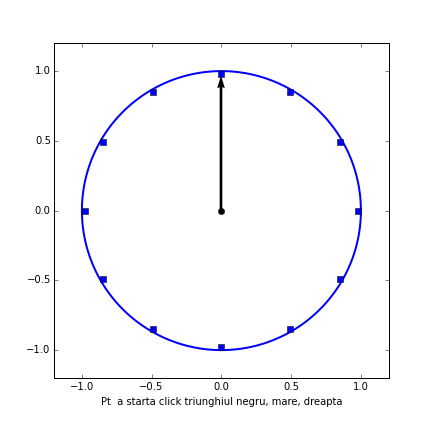
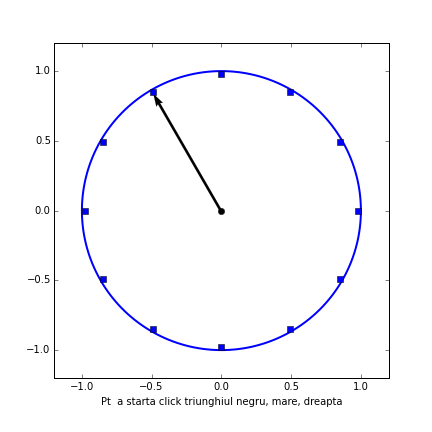
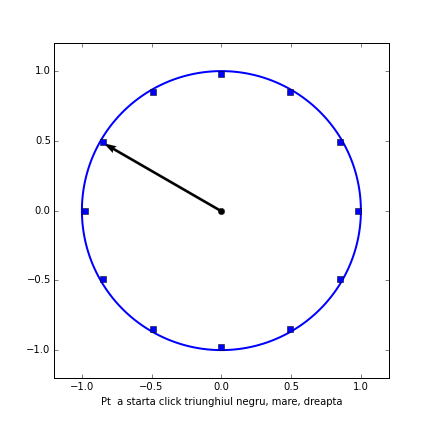
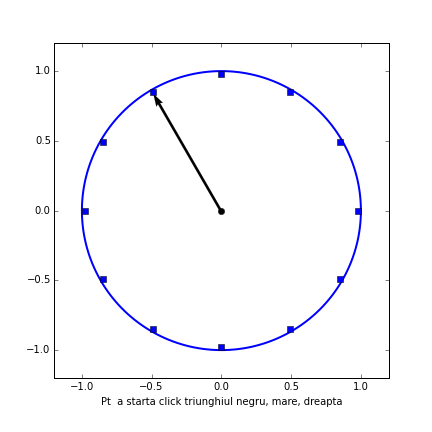
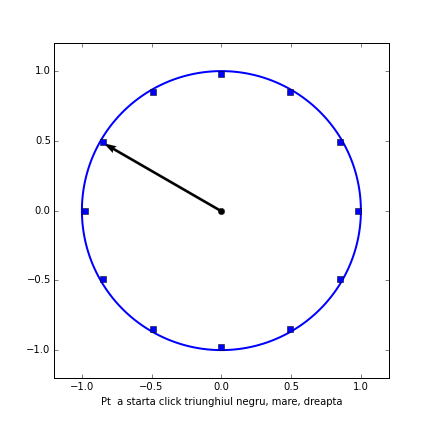
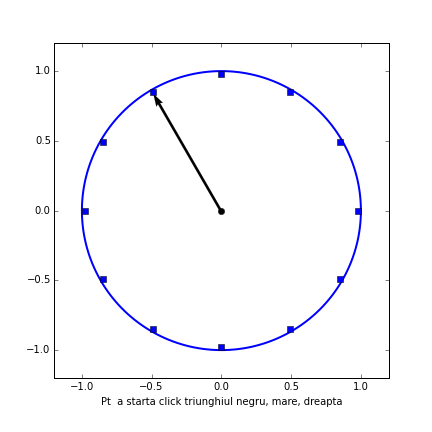
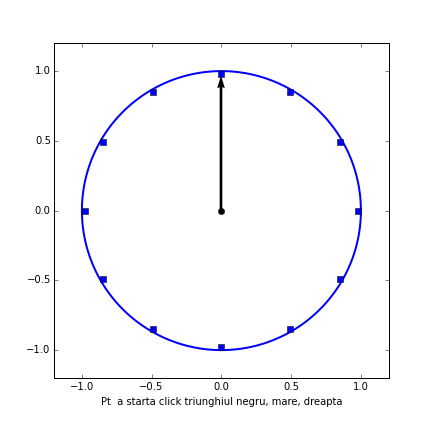
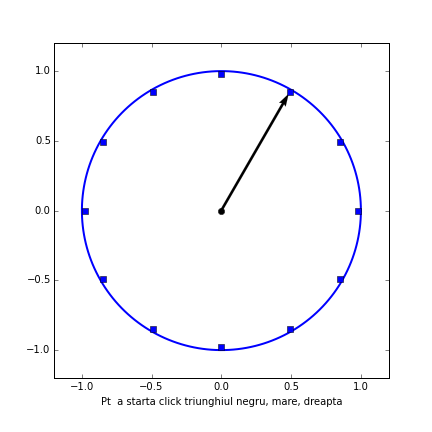
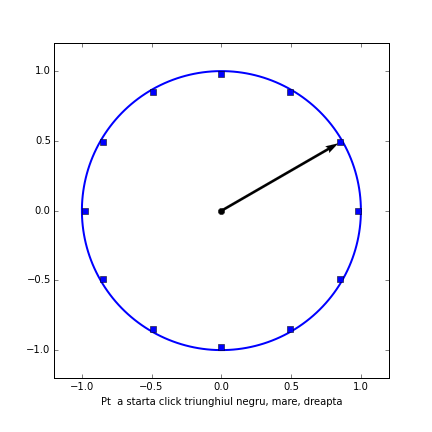
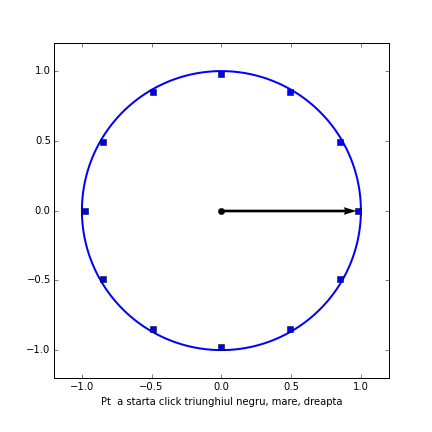
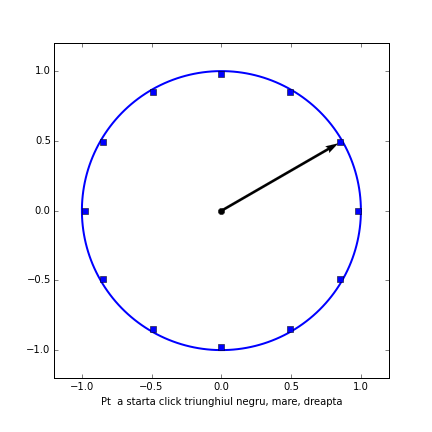
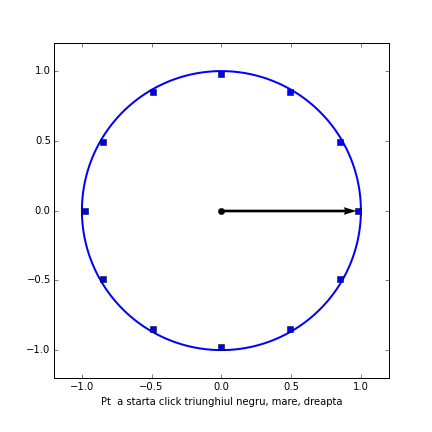
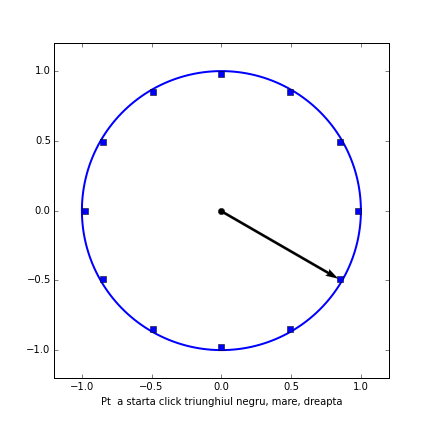
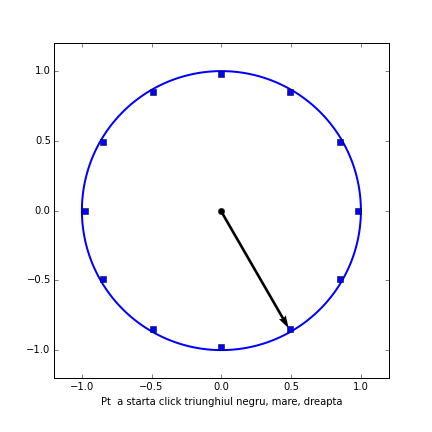

In [15]:
anim=RandWalkClock()
plt.xlabel('Pt  a starta click triunghiul negru, mare, dreapta')
IPython_display.display_animation(anim, default_mode='once')  

Tema:
  - Scrieti matricea de tranzitie, $Q$,  a lantului Markov. Este lantul ireductibil, dar periodic?
  - Determinati fara niciun calcul, ci doar observand o particularitate a matricii $Q$, care este distributia de echilibru. Argumentati!
    

In [12]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()